***Antonio Soares Couto Neto***

**Exercícios de Aprendizado Supervisionado**

In [2]:
#Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


**Download Dataset** - [Crop recommendation data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV)

O dataset **Crop Recommendation Data** contém um total de 1697 amostras, referente as características de solo e condições ambientais para o crescimento de diversas culturas.

Os dados estão estruturados nas seguintes colunas:
N (Nitrogênio): Quantidade de nitrogênio no solo.

*   P (Fósforo): Quantidade de fósforo no solo
*   K (Potássio): Quantidade de potássio no solo
*   temperature (Temperatura): Temperatura ambiente em graus Celsius
*   humidity (Umidade): Umidade relativa do ar em porcentagem
ph: Valor de pH do solo
*   rainfall (Precipitação): Quantidade de precipitação em mm
*   label: A cultura recomendada para plantio, com base nas condições descritas


**Importante:** em *label*, temos os rótulos (classes) que representam diferentes culturas agrícolas: Rice (Arroz), Maize (Milho), Soyabeans (Soja), Beans (Feijão), Peas (Ervilhas), Groundnuts (Amendoins), Cowpeas (Feijão-caupi), Banana, Mango (Manga), Grapes (Uvas), Watermelon (Melancia), Apple (Maçã), Orange (Laranja), Cotton (Algodão) e Coffee (Café)

**Exercício 1 – Leitura Dataset**

Realize a leitura dos dados e exiba as informações gerais do dataset

Exiba quantas amostras existem por classe (label)


In [22]:
# Carregar os dados
data = pd.read_csv("Crop_recommendation.csv")

# Informacoes gerais do dataset
data.info()

# Exibir quantas amostras existem por classe (label)
data.label.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


label
rice          139
Soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
grapes        100
watermelon    100
apple         100
cotton        100
Name: count, dtype: int64

**Exercício 2 – Preparação dos Dados, divisão treinamento e testes**

Realize a divisão dos dados em treinamento e testes

In [23]:
# Visualizando a distribuição dos dados
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


In [24]:
# Preparação dos dados
X = data.drop('label', axis=1)
y = data['label']

# Codificar a variável alvo
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Exercício 3 – Treinamento do Modelo (pode ser o K-NN ou Decision Tree)**

Escolha um algoritmo da biblioteca Scikit-learn que seja adequado para treinar um modelo de recomendação de plantio a partir das variaveis presentes no conjunto de dados.

In [25]:
# Treinar o modelo KNN
k = 3 #Número de vizinhos próximos

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

**Exercício 4 – Avaliar o Modelo**

Utilize a métrica adequada para avaliar o modelo a partir dos dados de treinamento

A acurácia do classificador é:  0.9941176470588236


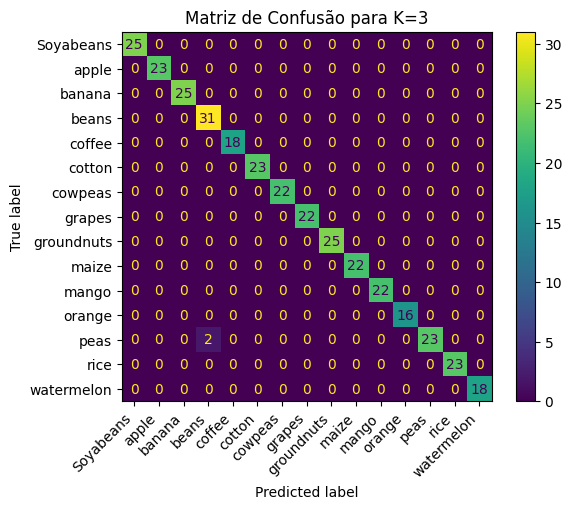

In [27]:
# Calcular a acurácia do classificador
print("A acurácia do classificador é: ", accuracy_score(y_test, y_pred))

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label_encoder.classes_)
disp.plot()

# Ajustar as labels
plt.xticks(rotation=45, ha='right')  # Rotacionar labels do eixo x
plt.yticks(rotation=0)  # Rotacionar labels do eixo y
plt.title(f'Matriz de Confusão para K={k}')
plt.show()